In [38]:
from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import numpy as np

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

### NeuralNetwork

With the test_network class it's easy to test new combinations parameters

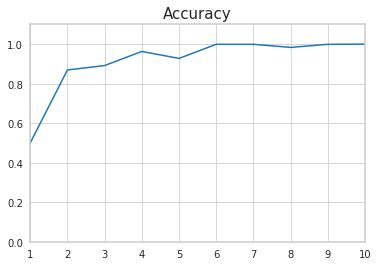

With mean accuracy= 0.91318359375


In [39]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### SimpleConv

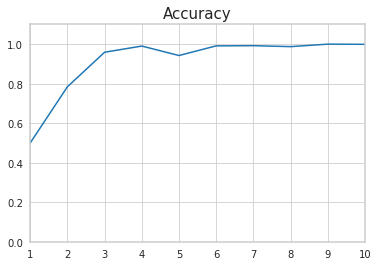

With mean accuracy= 0.91455078125


In [40]:
model = Models.SimpleConv()
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### ConvNet

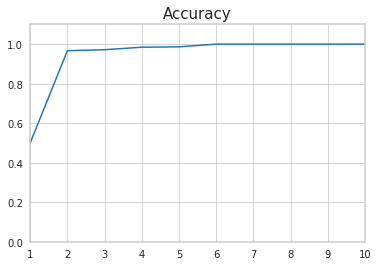

With mean accuracy= 0.94091796875


In [41]:
model = Models.LeNet_5()
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Br_Net

In [42]:
model = Models.Br_Net()
c = CI.confounder()
c.generate_data(mode="br-net", samples=512)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})

([[0.5,
   0.5,
   0.8544921875,
   0.5,
   0.56640625,
   1.0,
   1.0,
   1.0,
   0.9912109375,
   0.986328125]],
 [])

## Testing new plotting framework

In [43]:
importlib.reload(CI)
model = Models.SimpleConv()
c = CI.confounder()
c.generate_data(mode="br-net", samples=128, test_confounding=[0,0.5,1])
c.train(model=model, epochs=100, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
print()

There are multiple arrays of accuracy. Only showing the first one. Use accuracy_vs_strength to show all


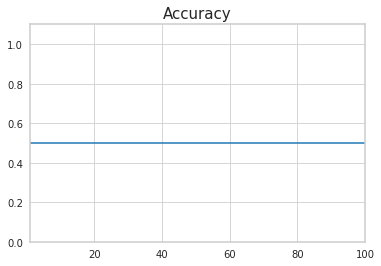

With mean accuracy= 0.5
There are multiple arrays of data. Only showing the first one.


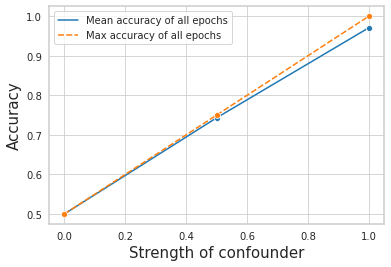

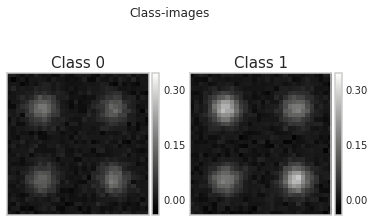

In [44]:
importlib.reload(CI)
c.plot(accuracy_vs_epoch=True, class_images=True, accuracy_vs_strength=True)